## Import Packages

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt

## Load the dataset

In [2]:
h5 = pd.read_csv(r"C:\Users\urlinga\OneDrive - Queens University of Charlotte\Desktop\BIO_350_Final\SpatialPredictions_H5.csv")
h7 = pd.read_csv(r"C:\Users\urlinga\OneDrive - Queens University of Charlotte\Desktop\BIO_350_Final\SpatialPredictions_H7.csv")

## Selecting Predictor Variables
Here I define which columns from the dataset will be used in the model.  
- **Features (X):** Latitude, Longitude, and Month — these are the inputs the model uses to make predictions.  
- **Target (y):** Prevalence — this is the value the model is trying to predict.

I then separate the dataset into:
- **X (feature matrix):** the variables the model learns from  
- **y (target variable):** the influenza prevalence values the model will try to predict

This step prepares the data so the Random Forest model knows what information to use as inputs and what outcome it should learn to predict.

In [3]:
features = ['Lat', 'Long', 'Month'] # Features used for training

x_h5 = h5[features] # Feature matrix for H5
x_h7 = h7[features] # Feature matrix for H7

y_h5 = h5['Prevalence'] # Target variable for H5
y_h7 = h7['Prevalence'] # Target variable for H7

# Data Visualization

### Spatial Visualization of Raw Influenza Data

Before training the Random Forest model, I created a scatterplot of the raw dataset to visualize the geographic distribution of influenza prevalence. Each point represents an observation, plotted by its latitude and longitude, and colored by its prevalence value. This helps reveal any spatial patterns or clustering in the data and provides context for how location may influence influenza spread.


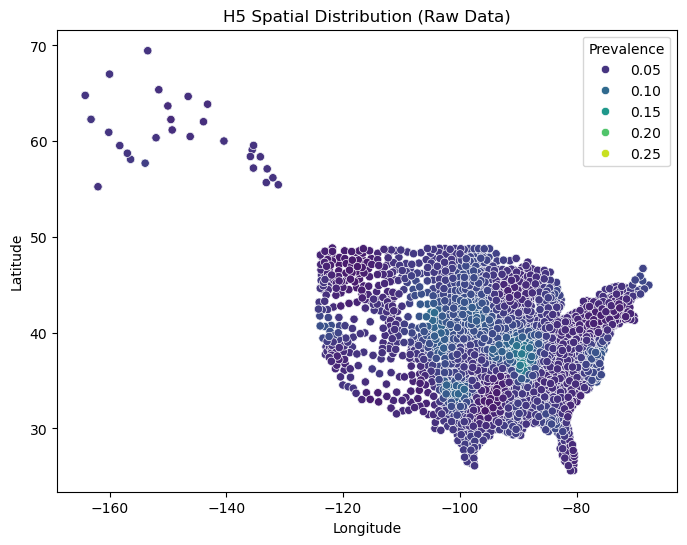

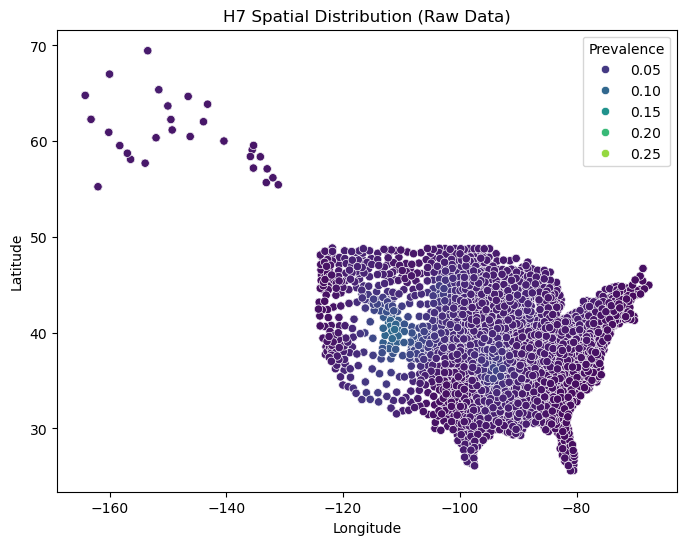

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.scatterplot(data=h5, x="Long", y="Lat", hue="Prevalence", palette="viridis")
plt.title("H5 Spatial Distribution (Raw Data)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

plt.figure(figsize=(8,6))
sns.scatterplot(data=h7, x="Long", y="Lat", hue="Prevalence", palette="viridis")
plt.title("H7 Spatial Distribution (Raw Data)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

### Distribution of Influenza Prevalence Values

Before modeling, I examined the distribution of prevalence values for both influenza strains.
These histograms help identify skew, detect outliers, and understand whether prevalence values cluster near zero or show wider variability.
This is important because the shape of the response variable influences how well a regression model can fit the data.

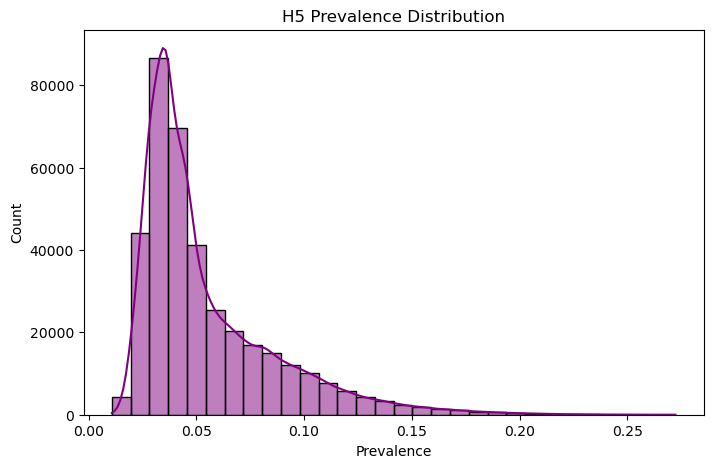

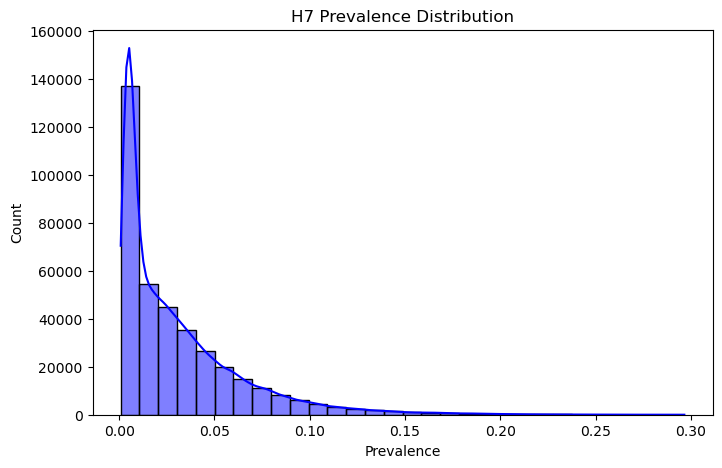

In [10]:
plt.figure(figsize=(8,5))
sns.histplot(h5['Prevalence'], bins=30, kde=True, color='purple')
plt.title("H5 Prevalence Distribution")
plt.xlabel("Prevalence")
plt.ylabel("Count")
plt.show()

plt.figure(figsize=(8,5))
sns.histplot(h7['Prevalence'], bins=30, kde=True, color='blue')
plt.title("H7 Prevalence Distribution")
plt.xlabel("Prevalence")
plt.ylabel("Count")
plt.show()


# Model Evaluation

### Train/Test Split
To make sure the model can actually predict new data—and not just memorize what it has already seen—I split the dataset into two parts:

- **80% training data** → used to teach the model  
- **20% test data** → used to check how well the model performs on data it has never seen before  

This is like studying using most of the practice problems and then testing yourself on the remaining ones you didn’t look at. It helps confirm whether the model learned real patterns instead of just memorizing the dataset.

In [5]:

X5_train, X5_test, y5_train, y5_test = train_test_split(x_h5, y_h5, test_size=0.2, random_state=42) # Splitting H5 data
X7_train, X7_test, y7_train, y7_test = train_test_split(x_h7, y_h7, test_size=0.2, random_state=42) # Splitting H7 data


### Run Random Forest Models
Here I create two Random Forest regression models—one for H5 and one for H7.  
The model learns patterns in the data by looking at the relationships between the features (Lat, Long, Month) and the target (Prevalence).

- `RandomForestRegressor()` creates the model  
- `fit()` trains the model using the training data  

After this step, each model has “learned” how the input features relate to influenza prevalence so it can make predictions on new data.

In [6]:
# Training Random Forest models
rf_h5 = RandomForestRegressor(n_estimators=300, random_state=42)
rf_h7 = RandomForestRegressor(n_estimators=300, random_state=42)

# Fitting the models
rf_h5.fit(X5_train, y5_train)
rf_h7.fit(X7_train, y7_train)


RandomForestRegressor(n_estimators=300, random_state=42)

### Evaluate Performance
##### $R^2$ tells you what percentage of the variation in the response variable (Prevalence) your model is able to explain
##### MSE measures the average size of prediction errors, squared. Aka "How far off are the predictions?"

In [7]:
h5_pred = rf_h5.predict(X5_test)
h7_pred = rf_h7.predict(X7_test)

print("H5 R²:", r2_score(y5_test, h5_pred))
print("H5 MSE:", mean_squared_error(y5_test, h5_pred))

print("H7 R²:", r2_score(y7_test, h7_pred))
print("H7 MSE:", mean_squared_error(y7_test, h7_pred))


H5 R²: 0.8927436508098632
H5 MSE: 0.00010958004009529888
H7 R²: 0.6977638561561299
H7 MSE: 0.00033396761888682233


### Predicted vs. Actual Prevalence

After training each Random Forest model, I plotted the predicted prevalence values against the actual observed prevalence in the test dataset.
A perfect model would place all points on the 1:1 diagonal line.
These scatterplots visually show how well the model fits the data and reveal whether the predictions systematically overestimate or underestimate prevalence.

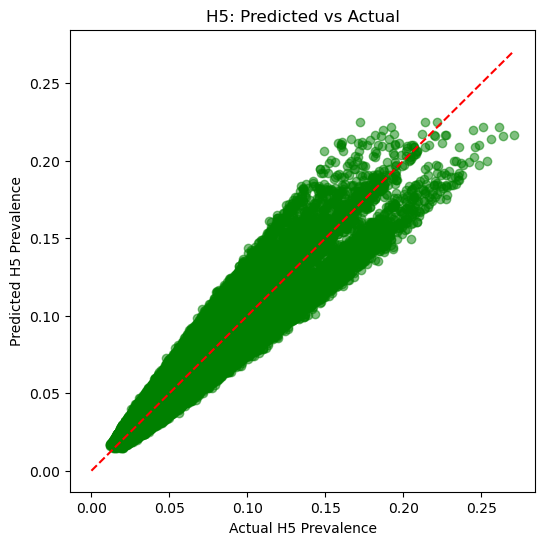

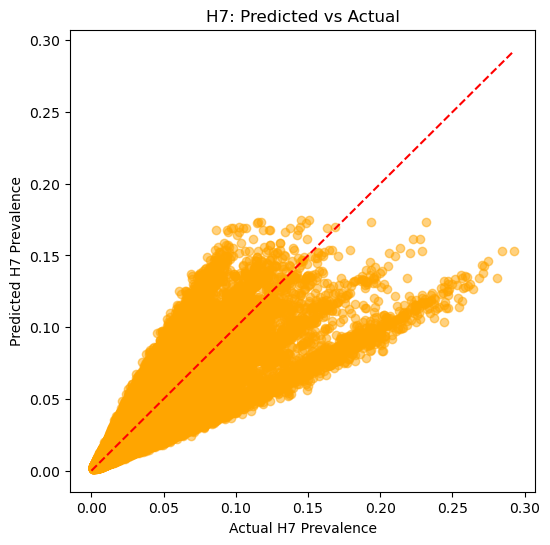

In [15]:
# H5 Predicted vs Actual
plt.figure(figsize=(6,6))
plt.scatter(y5_test, h5_pred, alpha=0.5, color='green')
plt.xlabel("Actual H5 Prevalence")
plt.ylabel("Predicted H5 Prevalence")
plt.title("H5: Predicted vs Actual")
plt.plot([0, max(y5_test)], [0, max(y5_test)], 'r--')
plt.show()

# H7 Predicted vs Actual
plt.figure(figsize=(6,6))
plt.scatter(y7_test, h7_pred, alpha=0.5, color='orange')
plt.xlabel("Actual H7 Prevalence")
plt.ylabel("Predicted H7 Prevalence")
plt.title("H7: Predicted vs Actual")
plt.plot([0, max(y7_test)], [0, max(y7_test)], 'r--')
plt.show()

# Interpretation / Feature Importance

### Compare Feature Importance
After training the Random Forest models, I calculated the feature importance scores.  
These values show how much each feature (Latitude, Longitude, Month) contributed to the model’s predictions.

Higher importance means the feature played a bigger role in determining influenza prevalence.  
The code below prints the importance of each feature for both the H5 and H7 models, allowing me to compare which variables were most influential.

In [8]:
import numpy as np

h5_importance = rf_h5.feature_importances_
h7_importance = rf_h7.feature_importances_

for name, imp in zip(features, h5_importance):
    print(f"H5 – {name}: {imp}")

print()

for name, imp in zip(features, h7_importance):
    print(f"H7 – {name}: {imp}")


H5 – Lat: 0.11678246461826411
H5 – Long: 0.17342474451068365
H5 – Month: 0.7097927908710523

H7 – Lat: 0.09018348603868656
H7 – Long: 0.12795912053863737
H7 – Month: 0.7818573934226761


### Side-by-Side Feature Importance Plot

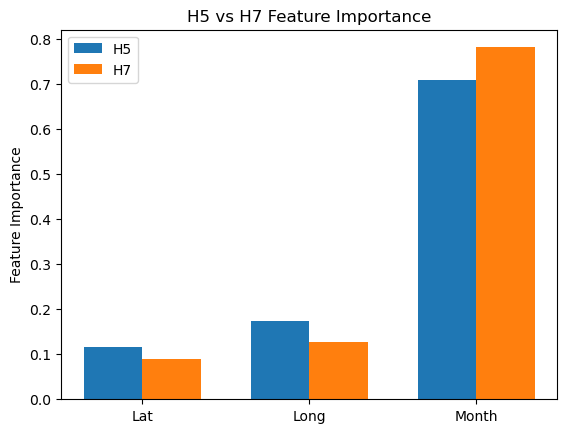

In [9]:
x = np.arange(len(features))
width = 0.35

plt.bar(x - width/2, h5_importance, width, label='H5')
plt.bar(x + width/2, h7_importance, width, label='H7')

plt.xticks(x, features)
plt.ylabel("Feature Importance")
plt.title("H5 vs H7 Feature Importance")
plt.legend()
plt.show()


### Seasonal Trend in Influenza Prevalence

Since "Month" was the most important predictor in both Random Forest models, I visualized average prevalence across months for each strain.
This trend line reveals seasonal dynamics in influenza prevalence and helps explain why the model relies so heavily on month compared to spatial variables.

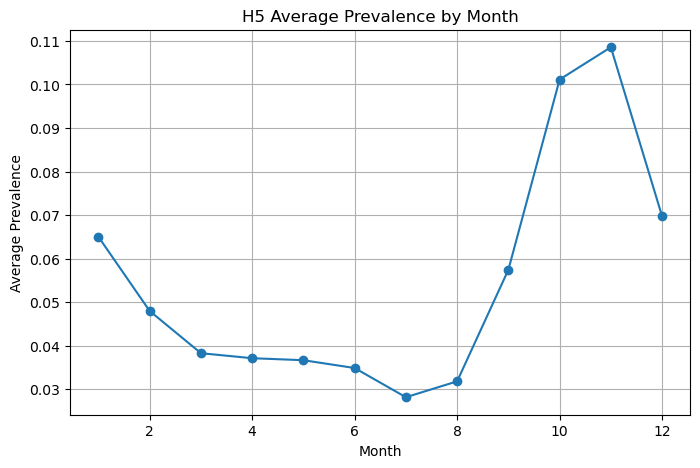

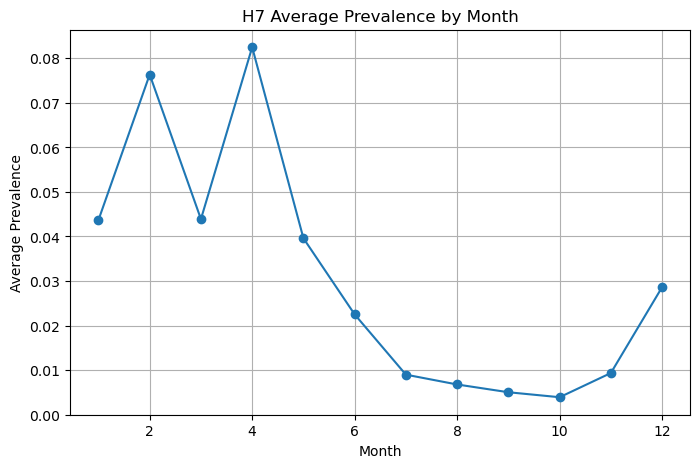

In [16]:
# H5 Seasonal Trend
plt.figure(figsize=(8,5))
h5.groupby("Month")['Prevalence'].mean().plot(kind='line', marker='o')
plt.title("H5 Average Prevalence by Month")
plt.xlabel("Month")
plt.ylabel("Average Prevalence")
plt.grid(True)
plt.show()

# H7 Seasonal Trend
plt.figure(figsize=(8,5))
h7.groupby("Month")['Prevalence'].mean().plot(kind='line', marker='o')
plt.title("H7 Average Prevalence by Month")
plt.xlabel("Month")
plt.ylabel("Average Prevalence")
plt.grid(True)
plt.show()

# Random Forest Results for H5 and H7 Avian Influenza Models

---
## Model Performance Summary

The Random Forest models performed strongly overall, with H5 showing the highest predictability:

* H5: R² = 0.8927, MSE = 0.0001096

* H7: R² = 0.6978, MSE = 0.0003340

The Predicted vs. Actual visualizations confirm this pattern:
H5 predictions fall tightly along the diagonal 1:1 line, while H7 shows more scatter, indicating greater variability and less predictable structure.

---

## Feature Importance

Both models ranked the predictors in the same order:

1. Month (dominant predictor)

2. Longitude

3. Latitude

The seasonal trend line plots support this finding, showing clear monthly fluctuations in average prevalence.
The prevalence histograms show that both strains are skewed toward low prevalence values, consistent with ecological expectations.

---

Interpretation

* Seasonality (Month) is the strongest driver of influenza prevalence for both strains.

* H5 is more predictable, showing tighter spatial-seasonal structure.

* H7 is more variable, likely influenced by ecological factors not included in this dataset.

* Spatial features (Latitude and Longitude) still play a role but much less than month.

Together, the model outputs and visualizations indicate that influenza prevalence follows strong seasonal patterns, with H5 exhibiting clearer structure than H7.